## Exploration

Shape for preprocessed train dataset: 
 (625184, 23)
Shape for only-fraud train dataset: 
 (1877, 23)


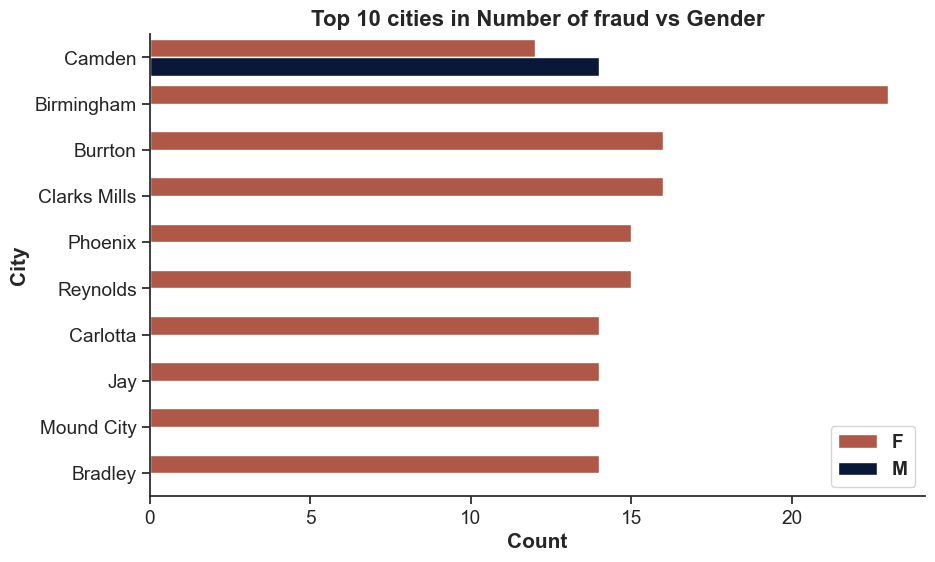

In [465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

df_combined = pd.concat([df_train, df_test], axis=0)

df = df_combined.copy()

df_fraud = df[df.is_fraud==1]

print('Shape for preprocessed train dataset: \n', df.shape)
print('Shape for only-fraud train dataset: \n', df_fraud.shape)

fig = plt.figure(figsize=(10,6))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

g = sns.countplot(y = 'city',
                  data=df_fraud, 
                  hue='gender',
                  width=0.8,
                  order=df_fraud.city.value_counts(sort=True, ascending=False).head(10).index)

g.set_title('Top 10 cities in Number of fraud vs Gender', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('City', fontsize=15, fontweight='bold')
g.legend(prop={'weight':'bold'})

plt.show()

  gender   count  Number of fraud  Fraud ratio
0      F  266778           1020.0         0.38
1      M  219476            857.0         0.39


FigureCanvasAgg is non-interactive, and thus cannot be shown


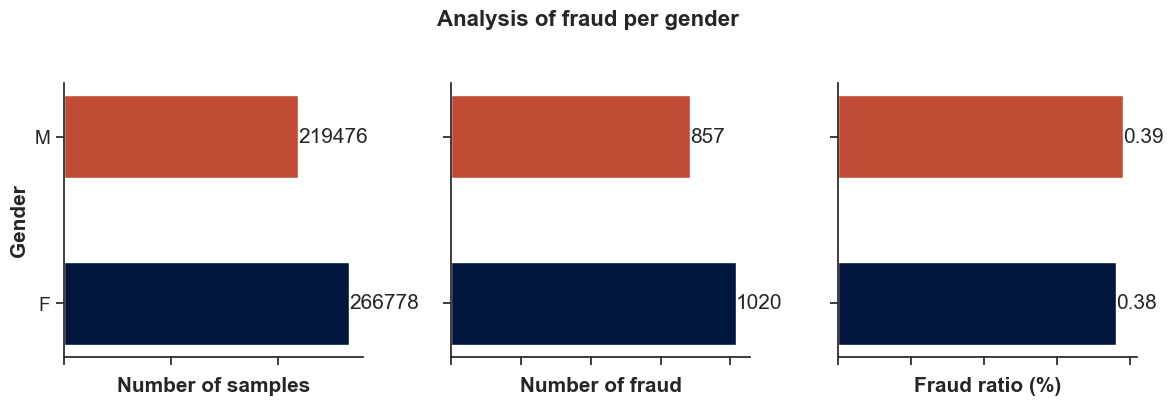

In [466]:
df_gender_is_fraud = df[['gender', 'is_fraud']]
df_gender_is_fraud = df_gender_is_fraud.groupby(['gender']).agg(['count', 'sum', 'mean',])
df_gender_is_fraud.columns = ['count', 'Number of fraud', 'Fraud ratio']
df_gender_is_fraud.reset_index(inplace=True)
df_gender_is_fraud["Fraud ratio"] = df_gender_is_fraud["Fraud ratio"].apply(lambda x: round(x*100, 2))
print(df_gender_is_fraud)

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(12,4))
colors = ["#00163E", "#C04C36"]
ax1.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['count'], 
         color=colors,
         height=0.5,)
ax1.set_ylabel("Gender", weight='bold', fontsize=15)
ax1.set_xlabel('Number of samples', weight='bold', fontsize=15)
ax1.bar_label(ax1.containers[0], label_type='edge')
ax1.set_xticklabels([])

ax2.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Number of fraud'], 
         color=colors,
         height=0.5)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xlabel('Number of fraud', weight='bold', fontsize=15)
ax2.bar_label(ax2.containers[0], label_type='edge')

ax3.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Fraud ratio'], 
         color=colors,
         height=0.5)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xlabel('Fraud ratio (%)', weight='bold', fontsize=15)
ax3.bar_label(ax3.containers[0], label_type='edge')

fig.suptitle("Analysis of fraud per gender", weight='bold', fontsize=16, y=1.02)
fig.tight_layout()

fig.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


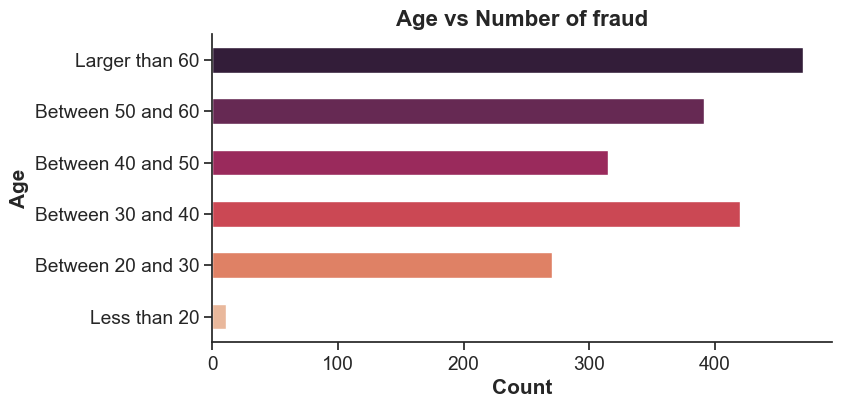

In [467]:
import pandas as pd
from datetime import datetime

def calculate_age(dob, trans_date):
    dob = datetime.strptime(dob, '%d/%m/%Y')
    trans_date = datetime.strptime(trans_date, '%d/%m/%Y %H:%M')
    age = trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
    return age

def convert_age_to_order(age):
    if age > 60:
        return 'Larger than 60'
    elif age >= 50:
        return 'Between 50 and 60'
    elif age >= 40:
        return 'Between 40 and 50'
    elif age >= 30:
        return 'Between 30 and 40'
    elif age >= 20:
        return 'Between 20 and 30'
    else:
        return 'Less than 20'

def add_age_column(df):
    df['age_intervals'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date_trans_time']), axis=1)
    df['age_intervals'] = df['age_intervals'].apply(convert_age_to_order)
    return df

df_fraud = add_age_column(df_fraud)

age_order = ['Larger than 60', 'Between 50 and 60', 'Between 40 and 50', 'Between 30 and 40', 'Between 20 and 30', 'Less than 20']

fig = plt.figure(figsize=(8,4))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette("rocket"))

g = sns.countplot(y='age_intervals',
                  data=df_fraud, 
                  order=age_order,
                  width=0.5,)

g.set_title('Age vs Number of fraud', fontdict = { 'fontsize': 16, 'fontweight':'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Age', fontsize=15, fontweight='bold')

plt.show()

## Feature Extraction

In [472]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

def calculate_age(dob, trans_date):
    """
    Calculate the age based on the date of birth (dob) and the transaction date (trans_date).

    Parameters:
    - dob (datetime.date): The date of birth.
    - trans_date (datetime.date): The transaction date.

    Returns:
    - int: The calculated age.

    """
    age = trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
    return age

def calculate_rfm_features(df, window_days):
    """
    Calculate RFM (Recency, Frequency, Monetary) features for a given DataFrame.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing transaction data.
    - window_days (int): The number of days to consider for calculating the RFM features.

    Returns:
    - rfm_features (pandas.DataFrame): The calculated RFM features for each credit card number.

    """
    now = df['trans_date_trans_time'].max()
    window_start = now - pd.Timedelta(days=window_days) 

    window_transactions = df[df['trans_date_trans_time'] >= window_start]

    rfm_features = window_transactions.groupby('cc_num')[['amt']].agg(['count', 'mean'])
    rfm_features.columns = [f'freq_{window_days}days', f'avg_amt_{window_days}days']

    return rfm_features

def calculate_merchant_risk_scores(df, window_days, delay_days):
    """
    Calculate the risk scores for each merchant based on the transaction data within a specified time window.

    Parameters:
    - df (DataFrame): The transaction data.
    - window_days (int): The number of days in the time window.
    - delay_days (int): The number of days to delay the window end.

    Returns:
    - terminal_risk (Series): The risk scores for each merchant within the specified time window.
    """
    now = df['trans_date_trans_time'].max()  
    window_end = now - pd.Timedelta(days=delay_days)  
    window_start = window_end - pd.Timedelta(days=window_days) 

    window_transactions = df[(df['trans_date_trans_time'] >= window_start) & (df['trans_date_trans_time'] < window_end)]

    terminal_risk = window_transactions.groupby('merchant')['is_fraud'].mean()
    terminal_risk.name = f'risk_score_{window_days}days'

    return terminal_risk

def calculate_category_risk_factors(df, window_days, delay_days):
    """
    Calculate the risk factors for each category within a specified time window.

    Args:
        df (pandas.DataFrame): The input DataFrame containing transaction data.
        window_days (int): The number of days in the time window.
        delay_days (int): The number of days to delay the window from the current date.

    Returns:
        pandas.Series: A Series containing the risk factors for each category within the specified time window.
    """
    now = df['trans_date_trans_time'].max()  
    window_end = now - pd.Timedelta(days=delay_days)  
    window_start = window_end - pd.Timedelta(days=window_days) 

    window_transactions = df[(df['trans_date_trans_time'] >= window_start) & (df['trans_date_trans_time'] < window_end)]

    category_risk = window_transactions.groupby('category')['is_fraud'].mean()
    category_risk.name = f'category_risk_{window_days}days'

    return category_risk

def extract_time_category_features(df):
    """
    Extracts time and category features from the given DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame containing the 'trans_time' and 'category' columns.

    Returns:
        pandas.DataFrame: The DataFrame with additional features 'trans_hour', 'category_hour', and 'category_hour_encoded'.
    """
    df['trans_hour'] = df['trans_time'].apply(lambda x: x.hour)
    
    df['category_hour'] = df['category'].astype(str) + "_" + df['trans_hour'].astype(str)
    
    label_encoder = LabelEncoder()
    df['category_hour_encoded'] = label_encoder.fit_transform(df['category_hour'])

    return df

def calculate_odds_ratios(df, category_col='category_encoded'):
    """
    Calculate the odds ratios for each category in the specified column.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing the data.
    - category_col (str): The name of the column containing the categories. Default is 'category_encoded'.

    Returns:
    - pandas.Series: The odds ratios for each category.
    """

    fraud_counts = df[df['is_fraud'] == 1][category_col].value_counts().sort_index()
    non_fraud_counts = df[df['is_fraud'] == 0][category_col].value_counts().sort_index()
    odds = fraud_counts / non_fraud_counts
    overall_odds = df['is_fraud'].mean()
    odds_ratios = odds / overall_odds
    odds_ratios = odds_ratios.replace(np.inf, np.finfo(float).max)

    return odds_ratios

def process(df):
    """
    Process the given DataFrame by performing various data cleaning, feature engineering, and statistical calculations.

    Args:
        df (pandas.DataFrame): The input DataFrame containing transaction data.

    Returns:
        pandas.DataFrame: The processed DataFrame with additional features and calculated statistics.
    """
    print("Starting data processing...")
    # Data cleaning and feature engineering steps
    df['dob'] = pd.to_datetime(df['dob'], format='%d/%m/%Y')
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
    df['trans_date'] = df['trans_date_trans_time'].dt.date
    df['trans_time'] = df['trans_date_trans_time'].dt.time
    
    print("Cleaning data and calculating basic statistics...")
    
    # Calculate statistics for each cardholder
    agg_funcs = ['mean', 'std', 'min', 'max']
    cardholder_stats = df.groupby('cc_num')['amt'].agg(agg_funcs).rename(columns=dict(zip(agg_funcs, ['mean', 'std', 'min', 'max'])))
    df = df.join(cardholder_stats, on='cc_num', rsuffix='_cardholder')
    
    print("Category encoding and additional feature calculations...")
    
    # Perform category encoding and calculate additional features related to categories
    categorical_features = ['merchant', 'city', 'state', 'job']
    df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)
    df['category_encoded'] = LabelEncoder().fit_transform(df['category'])
    odds_ratios = calculate_odds_ratios(df, category_col='category_encoded')
    df['category_odds_ratio'] = df['category_encoded'].map(odds_ratios).fillna(1)
    category_freq = df['category_encoded'].value_counts().reset_index()
    category_freq.columns = ['category_encoded', 'category_freq']
    df = pd.merge(df, category_freq, on='category_encoded', how='left')
    
    print("Additional calculations and feature engineering...")
    
    # Perform additional calculations and merge the results with the DataFrame
    df['trans_date'] = pd.to_datetime(df['trans_date'])
    last_month = df['trans_date'].max().month
    df_last_month = df[df['trans_date'].dt.month == last_month]
    total_amount_per_category = df_last_month.groupby('category_encoded')['amt'].sum().reset_index(name='total_amt_last_month')
    std_dev_amount_per_category = df.groupby('category_encoded')['amt'].std().reset_index(name='std_dev_amt_per_category')
    df = df.merge(total_amount_per_category, on='category_encoded', how='left')
    df = df.merge(std_dev_amount_per_category, on='category_encoded', how='left')
    
    print("Additional category features...")
    
    # Perform additional calculations related to category frequency and entropy
    df_freq_var = df.groupby(['cc_num', 'category_encoded']).size().groupby(level=0).var().reset_index()
    df_freq_var.rename(columns={0: 'category_freq_var'}, inplace=True)
    df['most_freq_cat_percentage'] = df.groupby('cc_num')['category_encoded'].transform(lambda x: (x == x.mode()[0]).sum()) / df.groupby('cc_num')['category_encoded'].transform('count')
    from scipy.stats import entropy
    def calc_entropy(series):
        value_counts = series.value_counts()
        return entropy(value_counts)
    df_entropy = df.groupby('cc_num')['category_encoded'].apply(calc_entropy).reset_index()
    df_entropy.rename(columns={'category_encoded': 'category_entropy'}, inplace=True)
    df = df.merge(df_freq_var, on='cc_num', how='left')
    df = df.merge(df_entropy, on='cc_num', how='left')
    
    print("Merge additional features...")
    
    # Perform additional calculations and merge the results with the DataFrame
    df['category_merchant_interaction'] = df['category_encoded'].astype(str) + '_' + df['merchant'].astype(str)
    df['category_state_interaction'] = df['category_encoded'].astype(str) + '_' + df['state'].astype(str)
    df['category_job_interaction'] = df['category_encoded'].astype(str) + '_' + df['job'].astype(str)
    overall_avg_amt = df['amt'].mean()
    df['category_avg_amt_ratio'] = df.groupby('category_encoded')['amt'].transform('mean') / overall_avg_amt
    label_encoder = LabelEncoder()
    df['category_state_interaction_encoded'] = label_encoder.fit_transform(df['category_state_interaction'])
    df['most_freq_cat'] = df.groupby('cc_num')['category_encoded'].transform(lambda x: x.mode().iloc[0])
    df['trans_in_most_freq_cat'] = (df['category_encoded'] == df['most_freq_cat']).astype(int)
    df['num_trans_most_freq_cat'] = df.groupby('cc_num')['trans_in_most_freq_cat'].transform('sum')
    df['prev_cat'] = df.groupby('cc_num')['category_encoded'].shift(1)
    df['cat_change'] = (df['prev_cat'] != df['category_encoded']).astype(int)
    df['cat_change_freq'] = df.groupby('cc_num')['cat_change'].transform('sum')
    df['total_spend'] = df.groupby('cc_num')['amt'].transform('sum')
    df['cat_spend'] = df.groupby(['cc_num', 'category_encoded'])['amt'].transform('sum')
    df['cat_spend_prop'] = df['cat_spend'] / df['total_spend']
    features_agg = df.groupby('cc_num').agg({
        'num_trans_most_freq_cat': 'max',
        'cat_change_freq': 'max',
        'cat_spend_prop': 'mean'
    }).reset_index()
    df = df.merge(features_agg, on='cc_num', how='left')
    
    print("Age and transaction time features...")
    
    # Perform additional calculations and feature engineering related to age and transaction time
    print("Calculating age at transaction and distances...")
    df['age_at_transaction'] = df.apply(lambda x: calculate_age(x['dob'], x['trans_date']), axis=1)
    df['trans_weekend'] = df['trans_date_trans_time'].dt.weekday >= 5
    df['trans_night'] = df['trans_date_trans_time'].dt.hour.apply(lambda x: 1 if 0 <= x < 6 or 20 <= x < 24 else 0)
    
    print("RFM features, merchant risk scores, and category risk factors...")
    
    # Calculate RFM features, merchant risk scores, and category risk factors
    for window_days in [7, 30]:
        rfm_features = calculate_rfm_features(df.copy(), window_days)
        df = df.merge(rfm_features, how='left', on='cc_num')
        terminal_risk = calculate_merchant_risk_scores(df.copy(), window_days, delay_days=7)
        df = df.merge(terminal_risk, how='left', on='merchant')
        category_risk = calculate_category_risk_factors(df.copy(), window_days, delay_days=7)
        df = df.merge(category_risk, how='left', on='category')
    
    print("Extracting time and category features...")
    
    # Extract additional time and category features
    df = extract_time_category_features(df)
    
    print("Dropping unnecessary columns...")
    
    # Drop unnecessary columns
    df.drop(columns=['first', 'last', 'street', 'gender', 'trans_date_trans_time', 'trans_date', 'trans_time', 'cc_num', 'merch_lat', 'merch_long', 'merchant', 'zip'], inplace=True)
    
    print("Data processing completed.")
    
    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
print("Processing training set...")
train_processed = process(trainingSet)
print("Training set processed.")

# Load test set
submissionSet = pd.read_csv("./data/test.csv")

print("Merging test set with training set for processing...")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['is_fraud_x'])
testX = testX.rename(columns={'is_fraud_y': 'is_fraud'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['is_fraud'].notnull()]

# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)

print("Test set and training set saved.")

Processing training set...
Starting data processing...
Cleaning data and calculating basic statistics...
Category encoding and additional feature calculations...
Additional calculations and feature engineering...
Additional category features...
Merge additional features...
Age and transaction time features...
Calculating age at transaction and distances...
RFM features, merchant risk scores, and category risk factors...
Extracting time and category features...
Dropping unnecessary columns...
Data processing completed.
Training set processed.


## Creating your model

In [476]:

import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['is_fraud', 'Id'], axis=1),
        X_train['is_fraud'],
        test_size=0.1,
        random_state=42
    )

# This is where you can do more feature selection
X_train_processed = X_train._get_numeric_data()
print(X_train_processed.columns)
X_test_processed = X_test._get_numeric_data()

# Set up XGBoost classifier with calculated scale_pos_weight
xgb_model = XGBClassifier(
                            eval_metric='auc',
                            random_state=42)

# Learn the model
xgb_model.fit(X_train_processed, Y_train)

# Pickle model
with open('xgboost_model.obj', 'wb') as f:
    pickle.dump(xgb_model, f)

# Predict probabilities
Y_test_probabilities = xgb_model.predict_proba(X_test_processed)[:, 1]

# Apply the custom threshold to determine class labels
Y_test_predictions_custom_threshold = (Y_test_probabilities >= 0.4332776963710785).astype(int)

# Evaluate on the testing set with custom threshold
print("Accuracy on testing set with custom threshold = ", accuracy_score(Y_test, Y_test_predictions_custom_threshold))
print("F1 score on testing set with custom threshold = ", f1_score(Y_test, Y_test_predictions_custom_threshold))


Index(['amt', 'city', 'state', 'lat', 'long', 'city_pop', 'job', 'unix_time',
       'mean', 'std', 'min', 'max', 'category_encoded', 'category_odds_ratio',
       'category_freq', 'total_amt_last_month', 'std_dev_amt_per_category',
       'most_freq_cat_percentage', 'category_freq_var', 'category_entropy',
       'category_avg_amt_ratio', 'category_state_interaction_encoded',
       'most_freq_cat', 'trans_in_most_freq_cat', 'num_trans_most_freq_cat_x',
       'prev_cat', 'cat_change', 'cat_change_freq_x', 'total_spend',
       'cat_spend', 'cat_spend_prop_x', 'num_trans_most_freq_cat_y',
       'cat_change_freq_y', 'cat_spend_prop_y', 'age_at_transaction',
       'trans_weekend', 'trans_night', 'freq_7days', 'avg_amt_7days',
       'risk_score_7days', 'category_risk_7days', 'freq_30days',
       'avg_amt_30days', 'risk_score_30days', 'category_risk_30days',
       'trans_hour', 'category_hour_encoded'],
      dtype='object')
Accuracy on testing set with custom threshold =  0.99948587

category_freq
category_encoded
trans_hour
amt
std_dev_amt_per_category
cat_change_freq_x
category_risk_7days
trans_night
mean
age_at_transaction
std
min
category_odds_ratio
most_freq_cat
cat_spend_prop_y
max
num_trans_most_freq_cat_x
risk_score_30days
category_risk_30days
cat_spend_prop_x
most_freq_cat_percentage
total_spend
city_pop
category_state_interaction_encoded
risk_score_7days
cat_spend
unix_time
category_hour_encoded
avg_amt_7days
category_avg_amt_ratio
freq_30days
category_entropy
total_amt_last_month
job
avg_amt_30days
category_freq_var
trans_weekend
freq_7days
long
state
lat
prev_cat
city
cat_change
trans_in_most_freq_cat
num_trans_most_freq_cat_y
cat_change_freq_y


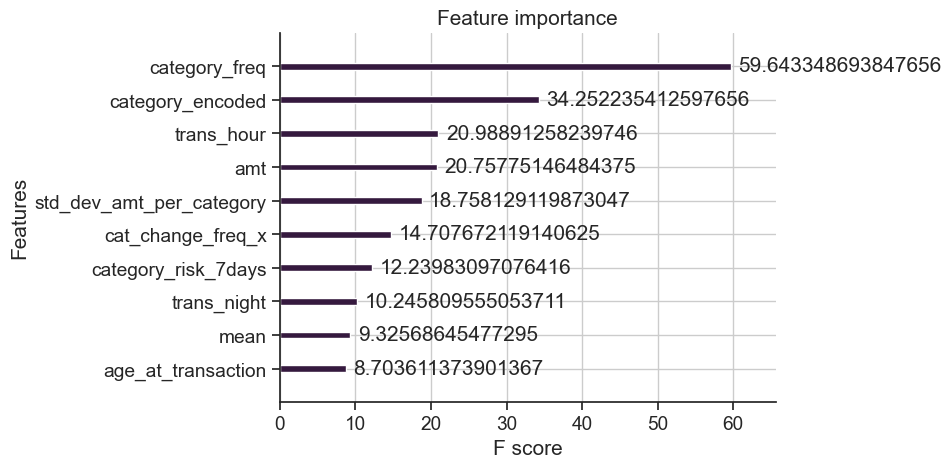

In [474]:
import xgboost as xgb

importances = xgb_model.feature_importances_
feature_names = X_train_processed.columns

sorted_features = [feature for _, feature in sorted(zip(importances, feature_names), reverse=True)]
for i in sorted_features:
    print(i)

xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.show()

In [475]:
from sklearn.metrics import precision_recall_curve

y_probs = xgb_model.predict_proba(X_test_processed)[:, 1]

precision, recall, thresholds = precision_recall_curve(Y_test, y_probs)
f1_scores = 2 * recall * precision / (recall + precision)
best_index = np.argmax(f1_scores)

best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

# Adjusting predictions based on the new threshold
adjusted_predictions = (y_probs >= best_threshold).astype(int)


Best Threshold: 0.4332776963710785
Best F1 Score: 0.9201277955271566


In [471]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, make_scorer

with open('xgboost_model.obj', 'rb') as f:
    xgb_model = pickle.load(f)

f1_scorer = make_scorer(f1_score)

rfecv = RFECV(estimator=xgb_model, step=1, cv=5, scoring=f1_scorer, n_jobs=-1)

rfecv.fit(X_train_processed, Y_train)

print("Optimal number of features: %d" % rfecv.n_features_)

plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (nb of correct classifications)")

mean_test_scores = rfecv.cv_results_['mean_test_score']

plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores)
plt.show()

feature_mask = rfecv.support_

X_train_reduced = X_train.iloc[:, feature_mask]


KeyboardInterrupt: 

In [432]:
columns_difference = set(X_train_processed.columns) - set(X_train_reduced.columns)
print(columns_difference)

print(X_train_processed.columns)
print(X_train_reduced.columns)

{'zip', 'avg_amt_per_category'}
Index(['amt', 'city', 'zip', 'lat', 'city_pop', 'job', 'unix_time', 'mean',
       'std', 'min', 'max', 'category_encoded', 'category_odds_ratio',
       'category_freq', 'avg_amt_per_category', 'std_dev_amt_per_category',
       'most_freq_cat_percentage', 'category_freq_var', 'category_entropy',
       'category_state_interaction_encoded', 'most_freq_cat',
       'num_trans_most_freq_cat_x', 'cat_change_freq_x', 'total_spend',
       'cat_spend', 'cat_spend_prop_x', 'cat_spend_prop_y',
       'age_at_transaction', 'trans_weekend', 'trans_night', 'avg_amt_7days',
       'risk_score_7days', 'category_risk_7days', 'avg_amt_30days',
       'risk_score_30days', 'category_risk_30days', 'trans_hour',
       'category_hour_encoded'],
      dtype='object')
Index(['amt', 'city', 'lat', 'city_pop', 'job', 'unix_time', 'mean', 'std',
       'min', 'max', 'category_encoded', 'category_odds_ratio',
       'category_freq', 'std_dev_amt_per_category', 'most_freq_cat_p

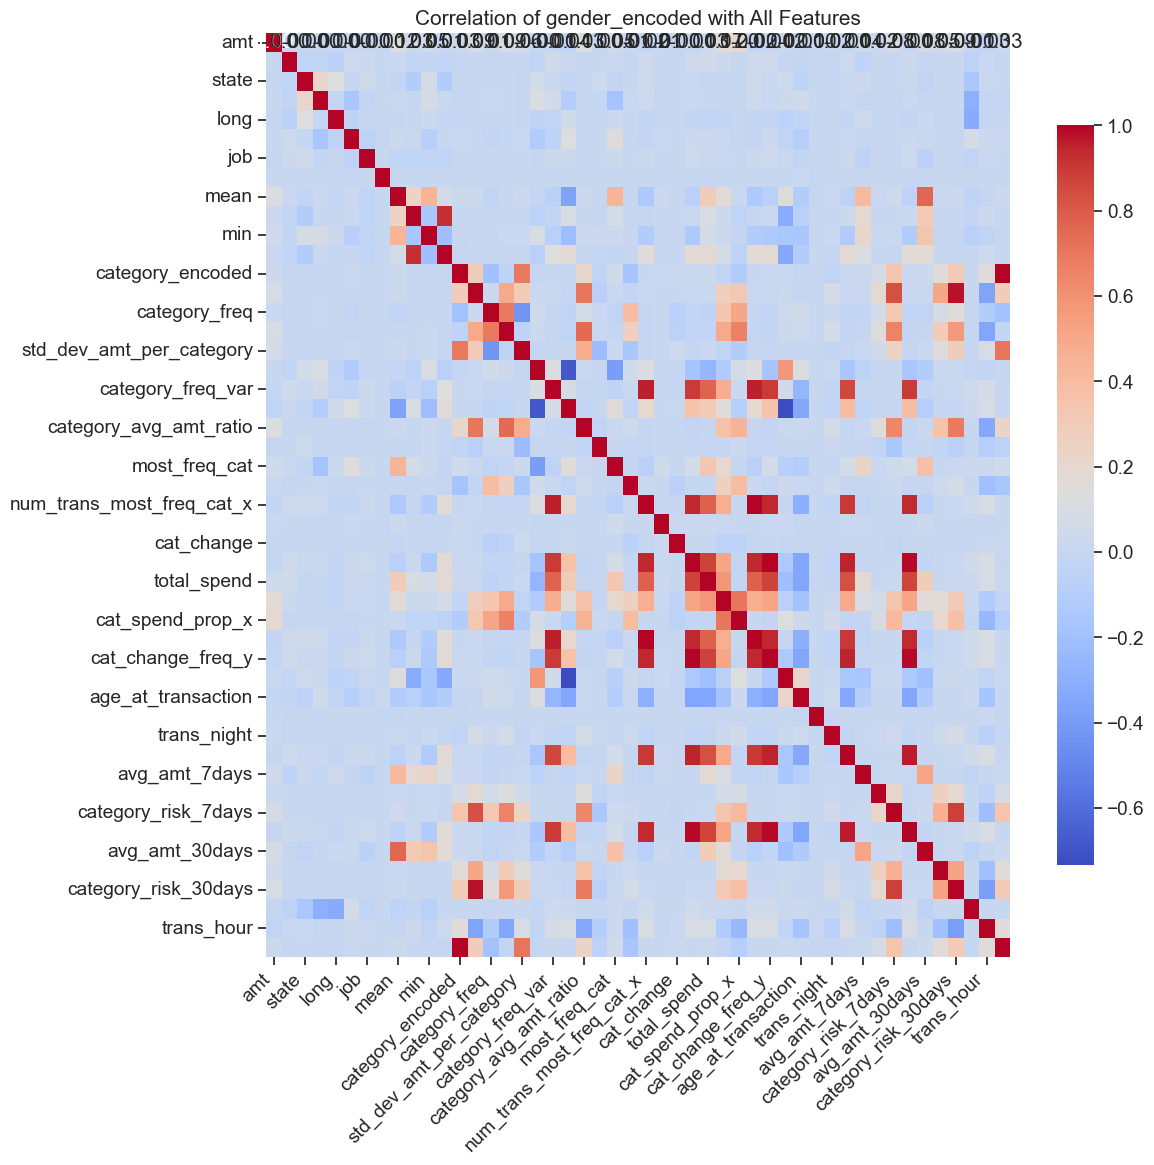

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train_processed.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation of gender_encoded with All Features')
plt.show()


(437628, 48)
(437628, 48)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


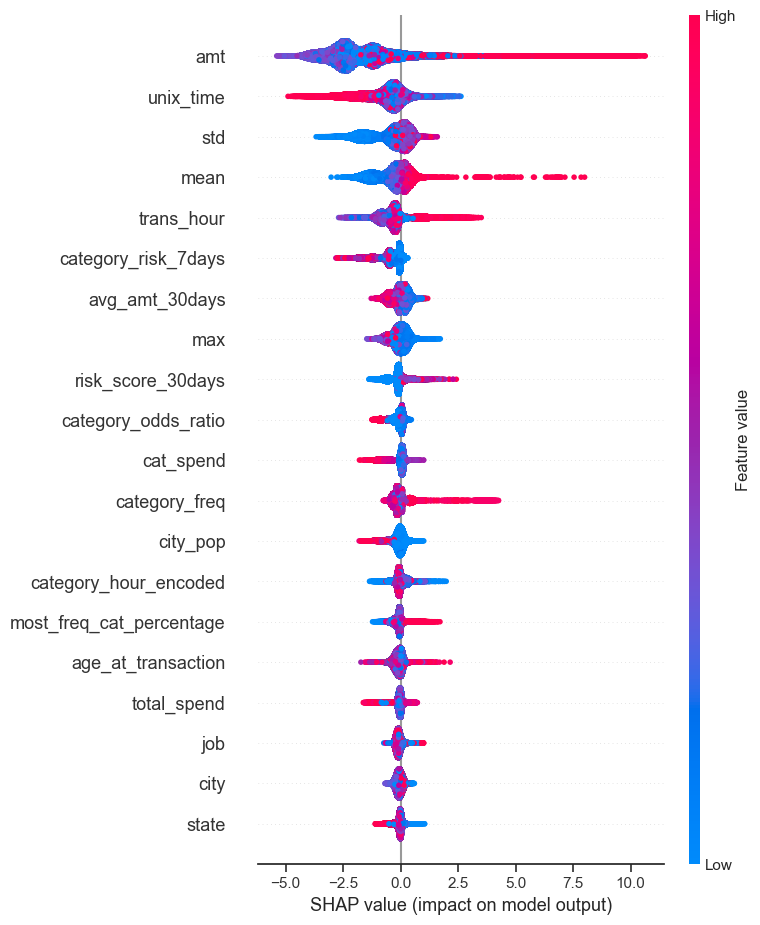

In [ ]:
import shap


explainer = shap.TreeExplainer(xgb_model)

test_IDs = df['Id'].copy()

X_shap = X_train_processed.copy()  

shap_values = explainer.shap_values(X_shap) 

print(shap_values.shape)
print(X_train_processed.shape)
shap.summary_plot(shap_values, X_train_processed) 

## Create the Kaggle submission

In [444]:
X_submission = pd.read_csv("./data/X_test.csv")
test_IDs = X_submission['Id']
X_submission = X_submission.drop(columns=['is_fraud', 'Id'])
X_submission_processed = X_submission._get_numeric_data()


probabilities = xgb_model.predict_proba(X_submission_processed)[:, 1]
X_submission['is_fraud'] = (probabilities >=  0.4332776963710785).astype(int)
X_submission['Id'] = test_IDs


submission = X_submission[['Id', 'is_fraud']]
submission.to_csv("./data/submission.csv", index=False)


Now you can upload the `submission.csv` to kaggle